In [1]:
# import librari yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2


# Import Dataset

In [2]:
# nyalakan opsi untuk menampilkan semua nilai untuk pandas karena dataset lumayan banyak
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import dataset dengan pandas
df = pd.read_csv('/content/drive/MyDrive/VIX_RAKAMIN/HCI/application_train.csv')

In [4]:
# tampilkan sampel data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Dataset Basic Information

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# EDA

In [6]:
data = df.copy()

## Analisis Univariat
1. Distribusi Klien berdasarkan Kemampuan pembayaran (target)

target berisikan data bernilai true (1) apabila klien memiliki masalah dalam pembayaran sedangkan nilai false(0) apabila klien tidak memiliki masalah dalam pembayaran

In [7]:
# hitung jumlah target untuk masing - masing nilai nya
data_vc = pd.DataFrame(data['TARGET'].value_counts().reset_index())
data_vc

,TARGET,count
0,0,282686
1,1,24825


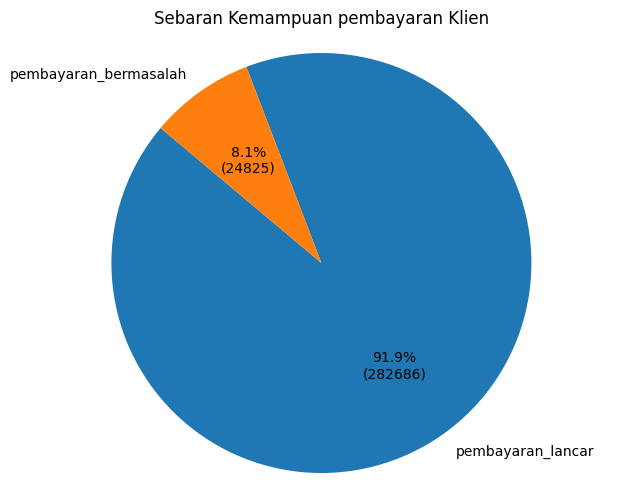

In [8]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

# Buat plot
label = ['pembayaran_lancar', 'pembayaran_bermasalah']
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data_vc['count'], labels=label, autopct=autopct_format(data_vc['count']), startangle=140)

# Atur aspek proporsional agar diagram pie menjadi lingkaran
ax.axis('equal')

# Tampilkan plot
plt.title('Sebaran Kemampuan pembayaran Klien')
plt.show()

Berdasarkan visualisasi diperoleh bahwa dari keseluruhan data sampel ini terdapat 8.1 % klien yang mengalami permasalahan pembayaran

## Analisis Bivariat

In [9]:
data_nct = data.groupby(['NAME_CONTRACT_TYPE']).size().reset_index(name='Jumlah_klien')
data_nct['pct'] = data_nct['Jumlah_klien'] / data_nct['Jumlah_klien'].sum() * 100
data_nct

,NAME_CONTRACT_TYPE,Jumlah_klien,pct
0,Cash loans,278232,90.478715
1,Revolving loans,29279,9.521285


In [10]:
data_nct2 = data.groupby(['NAME_CONTRACT_TYPE','TARGET']).size().reset_index(name='Jumlah_klien')
data_nct2['groupptc'] = 100 * data_nct2['Jumlah_klien'] / data_nct2.groupby('NAME_CONTRACT_TYPE')['Jumlah_klien'].transform('sum')
data_nct2['totalpct'] = data_nct2['Jumlah_klien'] / data_nct2['Jumlah_klien'].sum() * 100
data_nct2

,NAME_CONTRACT_TYPE,TARGET,Jumlah_klien,groupptc,totalpct
0,Cash loans,0,255011,91.654087,82.927440
1,Cash loans,1,23221,8.345913,7.551275
2,Revolving loans,0,27675,94.521671,8.999678
3,Revolving loans,1,1604,5.478329,0.521607


mayoritas tipe kontrak klien adalah cash loans

In [11]:
data_cg = data.groupby(['CODE_GENDER','TARGET']).size().reset_index(name='Jumlah_klien')
data_cg['groupptc'] = 100 * data_cg['Jumlah_klien'] / data_cg.groupby('CODE_GENDER')['Jumlah_klien'].transform('sum')
data_cg['totalpct'] = data_cg['Jumlah_klien'] / data_cg['Jumlah_klien'].sum() * 100
data_cg

,CODE_GENDER,TARGET,Jumlah_klien,groupptc,totalpct
0,F,0,188278,93.000672,61.226428
1,F,1,14170,6.999328,4.607965
2,M,0,94404,89.858080,30.699390
3,M,1,10655,10.141920,3.464917
4,XNA,0,4,100.000000,0.001301


In [12]:
data_foc = data.groupby(['FLAG_OWN_CAR','TARGET']).size().reset_index(name='Jumlah_klien')
data_foc['groupptc'] = 100 * data_foc['Jumlah_klien'] / data_foc.groupby('FLAG_OWN_CAR')['Jumlah_klien'].transform('sum')
data_foc['totalpct'] = data_foc['Jumlah_klien'] / data_foc['Jumlah_klien'].sum() * 100
data_foc

,FLAG_OWN_CAR,TARGET,Jumlah_klien,groupptc,totalpct
0,N,0,185675,91.499773,60.379954
1,N,1,17249,8.500227,5.609230
2,Y,0,97011,92.756270,31.547164
3,Y,1,7576,7.243730,2.463652


In [13]:
data_for = data.groupby(['FLAG_OWN_REALTY','TARGET']).size().reset_index(name='Jumlah_klien')
data_for['groupptc'] = 100 * data_for['Jumlah_klien'] / data_for.groupby('FLAG_OWN_REALTY')['Jumlah_klien'].transform('sum')
data_for['totalpct'] = data_for['Jumlah_klien'] / data_for['Jumlah_klien'].sum() * 100
data_for

,FLAG_OWN_REALTY,TARGET,Jumlah_klien,groupptc,totalpct
0,N,0,86357,91.675071,28.082573
1,N,1,7842,8.324929,2.550153
2,Y,0,196329,92.038423,63.844545
3,Y,1,16983,7.961577,5.522729


In [14]:
data_net = data.groupby(['NAME_EDUCATION_TYPE','TARGET']).size().reset_index(name='Jumlah_klien')
data_net['groupptc'] = 100 * data_net['Jumlah_klien'] / data_net.groupby('NAME_EDUCATION_TYPE')['Jumlah_klien'].transform('sum')
data_net['totalpct'] = data_net['Jumlah_klien'] / data_net['Jumlah_klien'].sum() * 100
data_net

,NAME_EDUCATION_TYPE,TARGET,Jumlah_klien,groupptc,totalpct
0,Academic degree,0,161,98.170732,0.052356
1,Academic degree,1,3,1.829268,0.000976
2,Higher education,0,70854,94.644885,23.041127
3,Higher education,1,4009,5.355115,1.303693
4,Incomplete higher,0,9405,91.515034,3.058427
5,Incomplete higher,1,872,8.484966,0.283567
6,Lower secondary,0,3399,89.072327,1.105326
7,Lower secondary,1,417,10.927673,0.135605
8,Secondary / secondary special,0,198867,91.060071,64.669882
9,Secondary / secondary special,1,19524,8.939929,6.349041


In [15]:
data_nht = data.groupby(['NAME_HOUSING_TYPE','TARGET']).size().reset_index(name='Jumlah_klien')
data_nht['groupptc'] = 100 * data_nht['Jumlah_klien'] / data_nht.groupby('NAME_HOUSING_TYPE')['Jumlah_klien'].transform('sum')
data_nht['totalpct'] = data_nht['Jumlah_klien'] / data_nht['Jumlah_klien'].sum() * 100
data_nht

,NAME_HOUSING_TYPE,TARGET,Jumlah_klien,groupptc,totalpct
0,Co-op apartment,0,1033,92.067736,0.335923
1,Co-op apartment,1,89,7.932264,0.028942
2,House / apartment,0,251596,92.204289,81.816911
3,House / apartment,1,21272,7.795711,6.917476
4,Municipal apartment,0,10228,91.460252,3.326060
5,Municipal apartment,1,955,8.539748,0.310558
6,Office apartment,0,2445,93.427589,0.795094
7,Office apartment,1,172,6.572411,0.055933
8,Rented apartment,0,4280,87.686949,1.391820
9,Rented apartment,1,601,12.313051,0.195440


In [16]:
data_nit = data.groupby(['NAME_INCOME_TYPE','TARGET']).size().reset_index(name='Jumlah_klien')
data_nit['groupptc'] = 100 * data_nit['Jumlah_klien'] / data_nit.groupby('NAME_INCOME_TYPE')['Jumlah_klien'].transform('sum')
data_nit['totalpct'] = data_nit['Jumlah_klien'] / data_nit['Jumlah_klien'].sum() * 100
data_nit

,NAME_INCOME_TYPE,TARGET,Jumlah_klien,groupptc,totalpct
0,Businessman,0,10,100.000000,0.003252
1,Commercial associate,0,66257,92.515743,21.546221
2,Commercial associate,1,5360,7.484257,1.743027
3,Maternity leave,0,3,60.000000,0.000976
4,Maternity leave,1,2,40.000000,0.000650
5,Pensioner,0,52380,94.613634,17.033537
6,Pensioner,1,2982,5.386366,0.969721
7,State servant,0,20454,94.245035,6.651469
8,State servant,1,1249,5.754965,0.406164
9,Student,0,18,100.000000,0.005853


In [17]:
data_nfs = data.groupby(['NAME_FAMILY_STATUS','TARGET']).size().reset_index(name='Jumlah_klien')
data_nfs['groupptc'] = 100 * data_nfs['Jumlah_klien'] / data_nfs.groupby('NAME_FAMILY_STATUS')['Jumlah_klien'].transform('sum')
data_nfs['totalpct'] = data_nfs['Jumlah_klien'] / data_nfs['Jumlah_klien'].sum() * 100
data_nfs

,NAME_FAMILY_STATUS,TARGET,Jumlah_klien,groupptc,totalpct
0,Civil marriage,0,26814,90.055416,8.719688
1,Civil marriage,1,2961,9.944584,0.962892
2,Married,0,181582,92.440132,59.048945
3,Married,1,14850,7.559868,4.829096
4,Separated,0,18150,91.805766,5.902228
5,Separated,1,1620,8.194234,0.526810
6,Single / not married,0,40987,90.192325,13.328629
7,Single / not married,1,4457,9.807675,1.449379
8,Unknown,0,2,100.000000,0.000650
9,Widow,0,15151,94.175783,4.926978


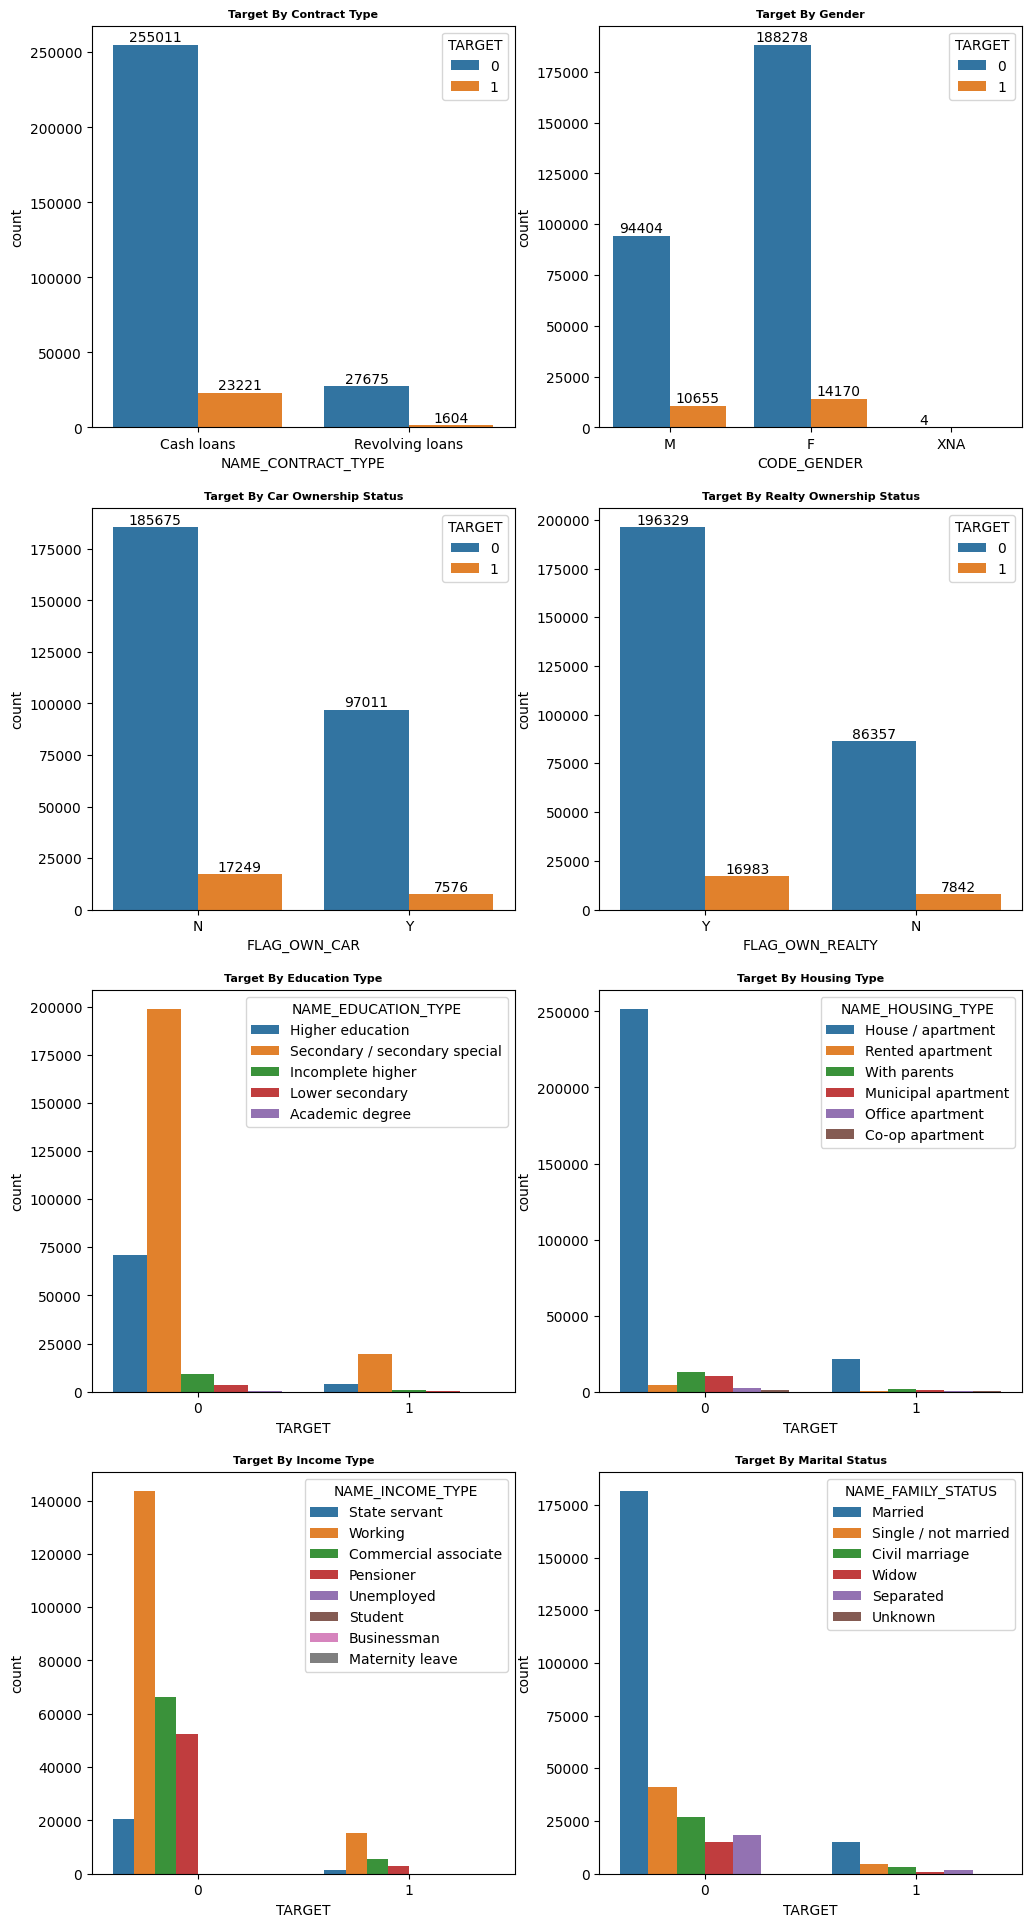

In [18]:
fig, ax = plt.subplots(4,2 , figsize=(12,24))

ax[0][0].set_title('Target By Contract Type', fontweight='bold', fontsize=8)
sns.countplot(x='NAME_CONTRACT_TYPE', data = data, hue = 'TARGET', ax=ax[0][0])

ax[0][1].set_title('Target By Gender', fontweight='bold', fontsize=8)
sns.countplot(x='CODE_GENDER', data = data, hue = 'TARGET', ax=ax[0][1])

ax[1][0].set_title('Target By Car Ownership Status', fontweight='bold', fontsize=8)
sns.countplot(x='FLAG_OWN_CAR', data = data, hue = 'TARGET', ax=ax[1][0])

ax[1][1].set_title('Target By Realty Ownership Status', fontweight='bold', fontsize=8)
sns.countplot(x='FLAG_OWN_REALTY', data = data, hue = 'TARGET', ax=ax[1][1])

ax[2][0].set_title('Target By Education Type', fontweight='bold', fontsize=8)
sns.countplot(x= 'TARGET', data = data, hue = 'NAME_EDUCATION_TYPE', ax=ax[2][0])

ax[2][1].set_title('Target By Housing Type', fontweight='bold', fontsize=8)
sns.countplot(x='TARGET', data = data, hue = 'NAME_HOUSING_TYPE', ax=ax[2][1])

ax[3][0].set_title('Target By Income Type', fontweight='bold', fontsize=8)
sns.countplot(x= 'TARGET', data = data, hue = 'NAME_INCOME_TYPE', ax=ax[3][0])

ax[3][1].set_title('Target By Marital Status', fontweight='bold', fontsize=8)
sns.countplot(x='TARGET', data = data, hue = 'NAME_FAMILY_STATUS', ax=ax[3][1])

for i in range(2):
    for j in range(2):
        for container in ax[i][j].containers:
            ax[i][j].bar_label(container, fmt='%.0f', label_type='edge')

untuk umur secara general dilakukan saja pembagian dengan 1 tahun = 365 hari
dan klasifikasi usia menurut Kemenkes (2009) adalah sebagai berikut.

-        Masa balita: 0-5 tahun.

-        Masa kanak-kanak: 5-11 tahun.

-        Masa remaja awal: 12-16 tahun.

-        Masa remaja akhir: 17-25 tahun.

-        Masa dewasa awal: 26-35 tahun.

-        Masa dewasa akhir: 36-45 tahun.

-        Masa lansia awal: 46-55 tahun.

-        Masa lansia akhir: 56-65 tahun.

-        Masa manusia lanjut usia (manula): lebih dari 65 tahun.

In [19]:
data['Age'] = np.floor(df['DAYS_BIRTH'] / -365).astype(int)

In [20]:
agecat = []
for i in data['Age']:
    if i < 26:
      agecat.append('Adolescent')
    elif i < 46:
        agecat.append('Adult')
    else:
        agecat.append('Elderly')

data['Age_category'] = agecat

In [21]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,Adolescent
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,Adult
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [22]:
data_agc = data.groupby(['Age_category','TARGET']).size().reset_index(name='Jumlah_klien')
data_agc['groupptc'] = 100 * data_agc['Jumlah_klien'] / data_agc.groupby('Age_category')['Jumlah_klien'].transform('sum')
data_agc['totalpct'] = data_agc['Jumlah_klien'] / data_agc['Jumlah_klien'].sum() * 100
data_agc

,Age_category,TARGET,Jumlah_klien,groupptc,totalpct
0,Adolescent,0,14402,88.258365,4.683410
1,Adolescent,1,1916,11.741635,0.623067
2,Adult,0,144672,90.645481,47.046122
3,Adult,1,14930,9.354519,4.855111
4,Elderly,0,123612,93.936515,40.197586
5,Elderly,1,7979,6.063485,2.594704


from matplotlib import pyplot as plt
data_agc['TARGET'].plot(kind='hist', bins=20, title='TARGET')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_agc['Jumlah_klien'].plot(kind='hist', bins=20, title='Jumlah_klien')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_agc['groupptc'].plot(kind='hist', bins=20, title='groupptc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_agc['totalpct'].plot(kind='hist', bins=20, title='totalpct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data_agc.groupby('Age_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_agc.plot(kind='scatter', x='TARGET', y='Jumlah_klien', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_agc.plot(kind='scatter', x='Jumlah_klien', y='groupptc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_agc.plot(kind='scatter', x='groupptc', y='totalpct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_agc['TARGET'].plot(kind='line', figsize=(8, 4), title='TARGET')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_agc['Jumlah_klien'].plot(kind='line', figsize=(8, 4), title='Jumlah_klien')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_agc['groupptc'].plot(kind='line', figsize=(8, 4), title='groupptc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_agc['totalpct'].plot(kind='line', figsize=(8, 4), title='totalpct')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_agc['Age_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_agc, x='TARGET', y='Age_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_agc['Age_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_agc, x='Jumlah_klien', y='Age_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_agc['Age_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_agc, x='groupptc', y='Age_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_agc['Age_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_agc, x='totalpct', y='Age_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Data Cleaning

## Duplicated data

In [23]:
data.duplicated().sum()

0

## Null value or missing value

In [24]:
data_null = data.isna().sum()
data_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [25]:
null_values = data.isnull().sum()
missing_data = pd.DataFrame(null_values, columns=['total_null']).reset_index()
missing_data['null_pct'] = (missing_data['total_null'] / len(data)) * 100
missing_data

,index,total_null,null_pct
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL,0,0.000000
8,AMT_CREDIT,0,0.000000
9,AMT_ANNUITY,12,0.003902


melihat terdapat beberapa kolom data dengan nilai null melebihi 25% dan juga sepertinya kolom kolom tersebut tidah terlalu relefan untuk digunakan pada model maka untuk kolom yang memiliki lebih dari 25% nilai null akan di drop saja dan juga untuk kolom kolom yang kurang berhubungan juga di drop

In [26]:
drop_list = missing_data[missing_data['null_pct']>25]['index'].tolist()

In [27]:
data_drop = data.drop(columns=drop_list)

untuk sisa nilai null yang ada pada data dilakukan imputasi saja untuk data numerik akan diimputasikan nilai median, dan untuk kolom dengan nama AMT_REQ nilai nan akan disi dengan nilai 0 saja dianggap dengan asumsi bahwa nilai null pada kolom tersebut adalah 0  sedangkan untuk data kategorik akan disisi dengan modus saja

In [28]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [29]:
data_drop.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR': 0, 'AMT_REQ_CREDIT_BUREAU_DAY':0, 'AMT_REQ_CREDIT_BUREAU_WEEK':0, 'AMT_REQ_CREDIT_BUREAU_MON':0, 'AMT_REQ_CREDIT_BUREAU_QRT':0, 'AMT_REQ_CREDIT_BUREAU_YEAR':0}, inplace=True)

In [30]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [31]:
num = data_drop.select_dtypes(include=['int64','float64']).columns.tolist()

for column in data_drop:
    if data_drop[column].isnull().any():
        if(column in num):
            data_drop[column]=data_drop[column].fillna(data_drop[column].median())

In [32]:
cat = data_drop.select_dtypes(include=['object']).columns.tolist()

for column in data_drop:
    if data_drop[column].isnull().any():
        if(column in cat):
            data_drop[column]=data_drop[column].fillna(data_drop[column].mode()[0])

In [33]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

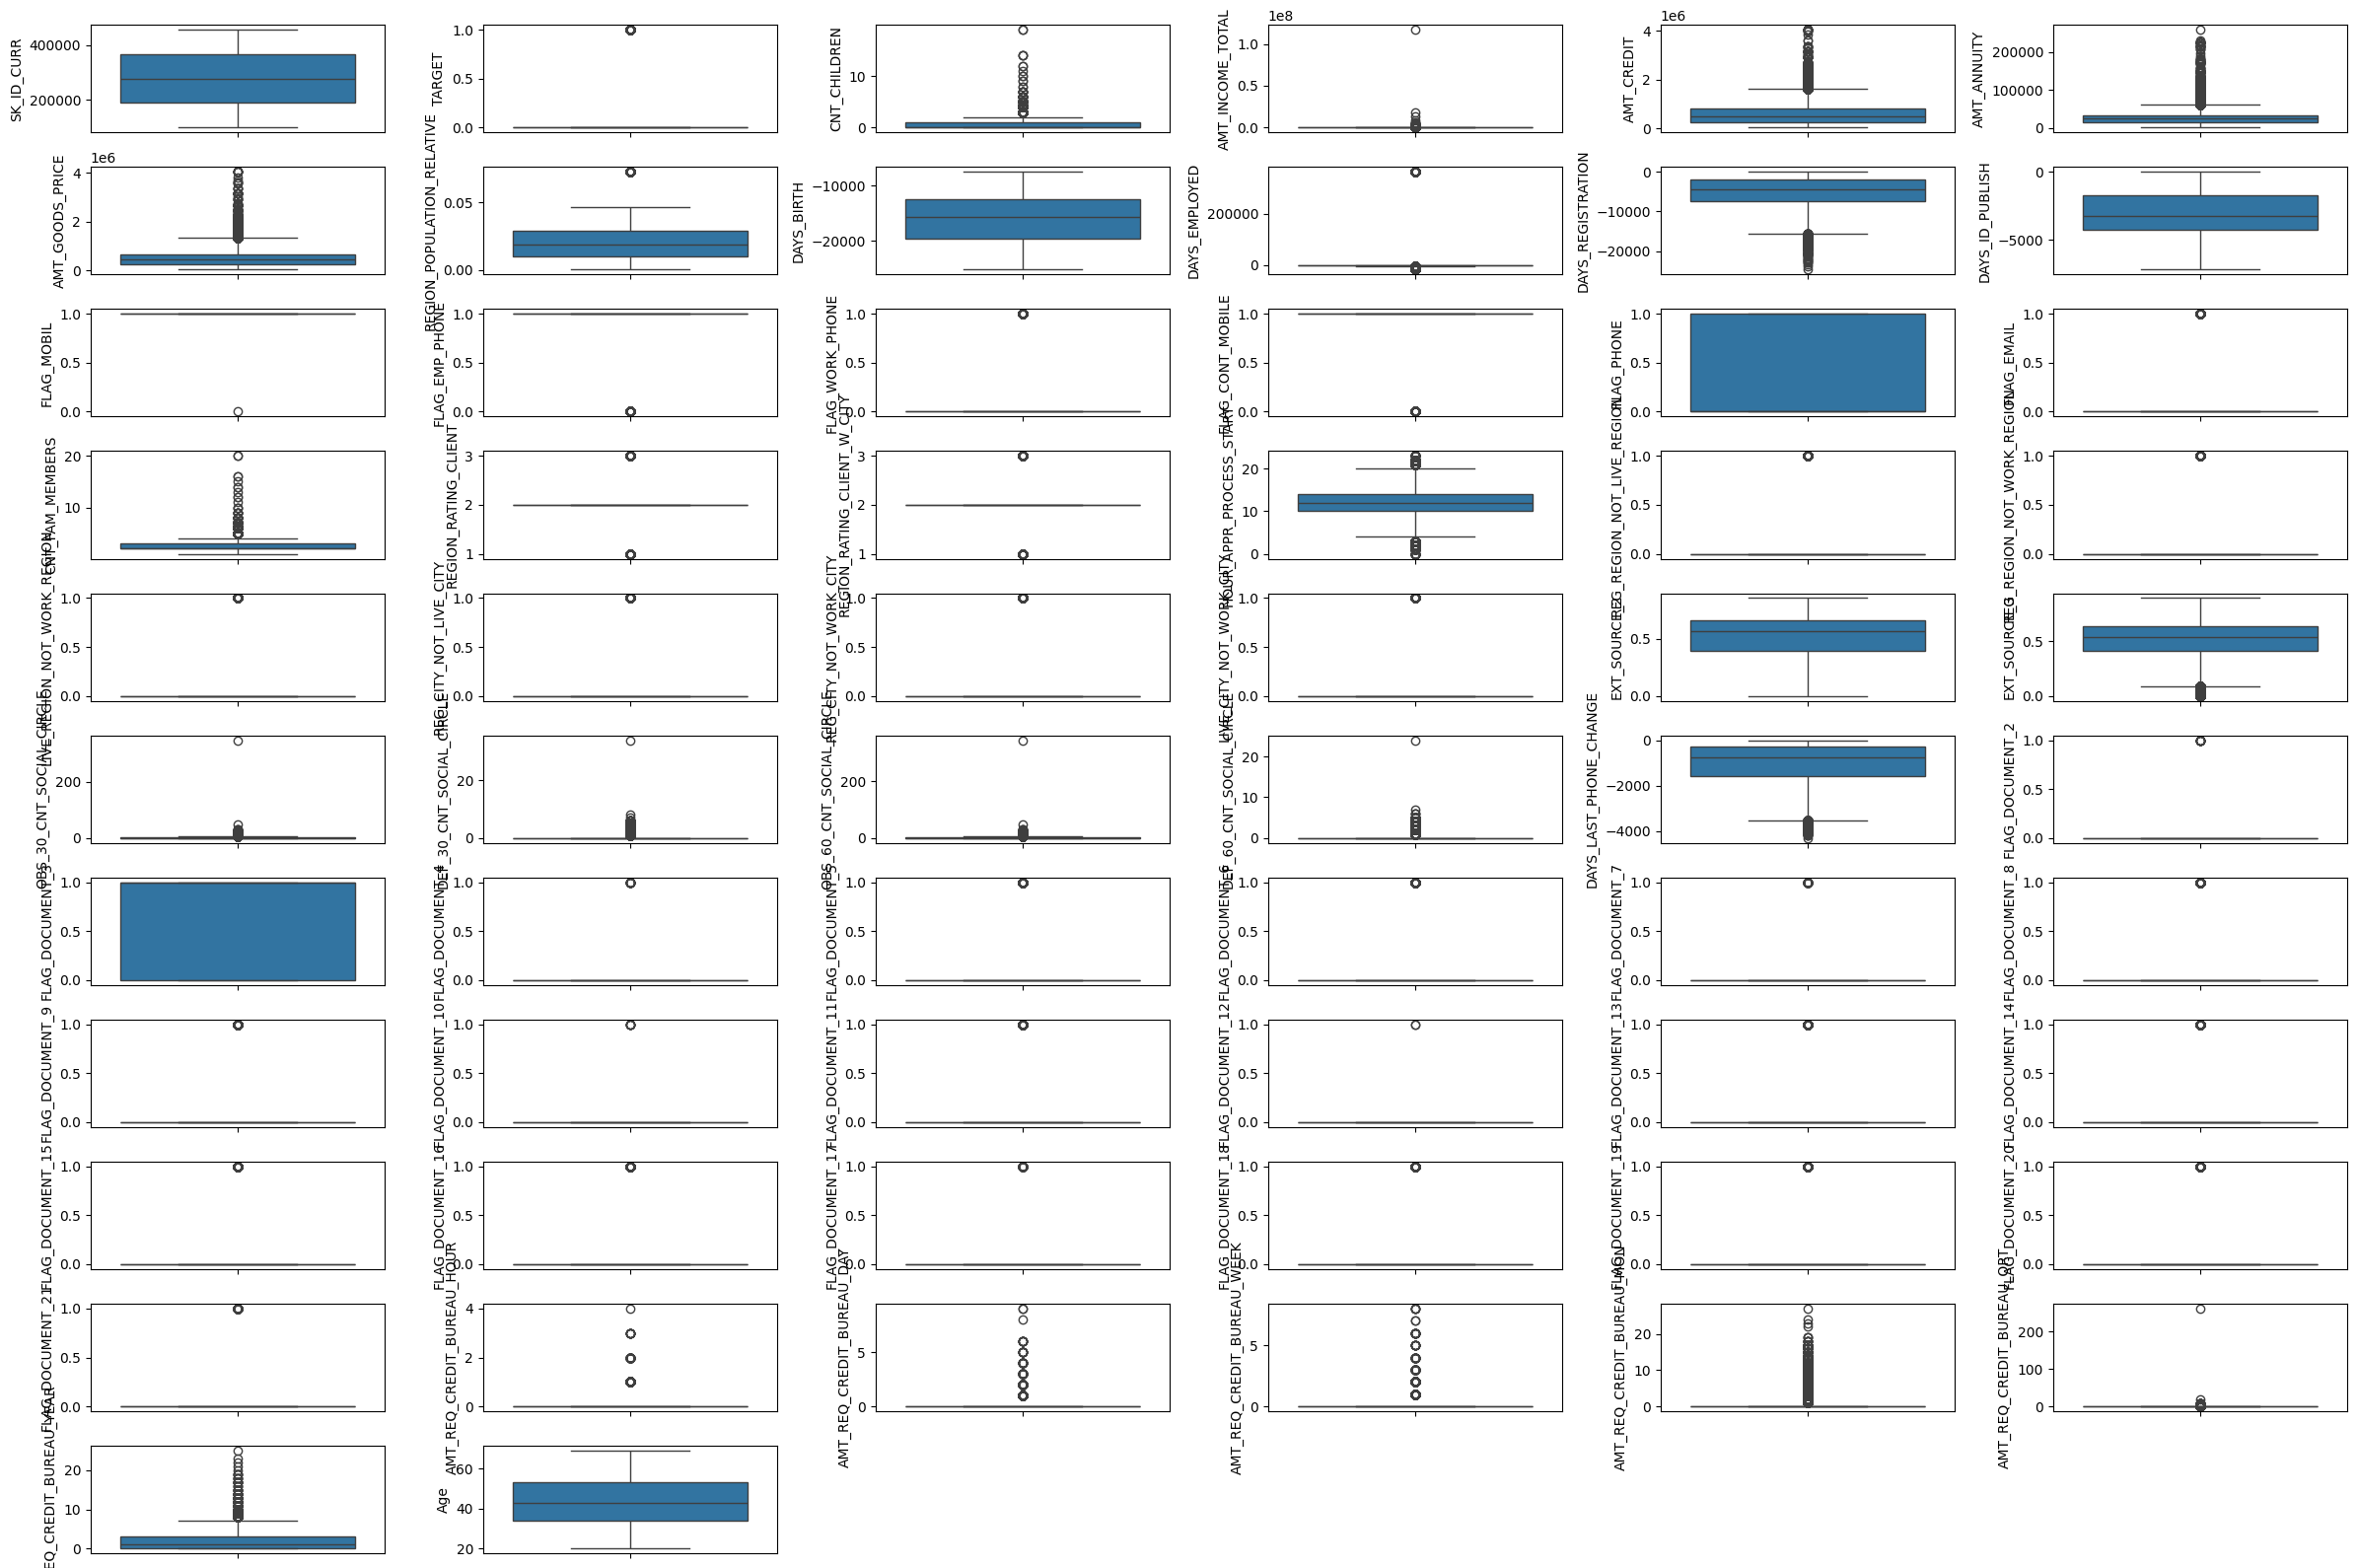

In [34]:
num = data_drop.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize = (24, 16))
for i,column in enumerate(num,1):
    plt.subplot(11, 6, i)
    sns.boxplot(data=data_drop, y= column, orient = 'v')
    plt.tight_layout()

untuk outlier tidak dilakukan handling diatasi dengan mengunakan model yang robust terhadap outlier

## Feature enginering

In [35]:
data_drop.drop(['SK_ID_CURR'], axis=1, inplace=True)

In [36]:
negative = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for i in negative:
  data_drop[i] = data_drop[i].abs()

### feature selection

## Encode string ke numerik

In [37]:
clean_df = data_drop.copy()

In [38]:
from sklearn.preprocessing import LabelEncoder

cat = clean_df.select_dtypes(include = ['object']).columns.tolist()

clean_df[cat] = clean_df[cat].apply(LabelEncoder().fit_transform)
clean_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_category
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,1
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,2
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,2
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,2


In [39]:
clean_df.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,Age_category
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.095213,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,5.222990,4.670288,3.188273,1.472312,1.290390,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,3.090732,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,29.450429,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,962.858119,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447,43.435968,1.374858
std,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,1.772626,2.544525,1.298753,1.168884,0.951168,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,2.149512,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,20.463558,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.807226,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821,11.954593,0.583498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [40]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  int64  
 2   CODE_GENDER                  307511 non-null  int64  
 3   FLAG_OWN_CAR                 307511 non-null  int64  
 4   FLAG_OWN_REALTY              307511 non-null  int64  
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              307511 non-null  int64  
 11  NAME_INCOME_TYPE             307511 non-null  int64  
 12  NAME_EDUCATION_TYPE          307511 non-null  int64  
 13 

# Modeling

Feature selection

In [41]:
from sklearn.model_selection import train_test_split

# Assuming df_cleanedd is your dataframe
X = clean_df.drop(['TARGET'], axis = 1)
y = clean_df['TARGET']


In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Menggunakan SelectKBest dengan f_classif untuk menghitung skor fitur
selector = SelectKBest(score_func=f_classif, k=35)
selected_features = selector.fit(X, y)

# Mendapatkan skor fitur
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selected_features.scores_})

# Mengurutkan fitur berdasarkan skor tertinggi
top_features = feature_scores.sort_values(by='Score', ascending=False).head(12)

# Menampilkan hasil
print(top_features)


                        Feature        Score
37                 EXT_SOURCE_2  8109.633923
38                 EXT_SOURCE_3  7659.288339
15                   DAYS_BIRTH  1893.976087
70                          Age  1893.726378
71                 Age_category  1359.430167
27  REGION_RATING_CLIENT_W_CITY  1144.461405
26         REGION_RATING_CLIENT  1070.491250
43       DAYS_LAST_PHONE_CHANGE   940.478790
11          NAME_EDUCATION_TYPE   922.808544
1                   CODE_GENDER   922.594003
18              DAYS_ID_PUBLISH   816.396507
34       REG_CITY_NOT_WORK_CITY   801.742167


In [43]:
featselc = top_features['Feature'].tolist()

## data spliting

In [44]:
from sklearn.model_selection import train_test_split

# Assuming df_cleanedd is your dataframe
X = clean_df[featselc]
y = clean_df['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
y_train.value_counts()

TARGET
0    197845
1     17412
Name: count, dtype: int64

terdapat class imbalance sehingga akan dilakukan oversampling dengan metode smote

## Class imbalance

In [46]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the 'Response' classes before and after SMOTE
print("Distribution of 'Response' classes before SMOTE:")
print(y_train.value_counts())

print("\nDistribution of 'Response' classes after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Distribution of 'Response' classes before SMOTE:
TARGET
0    197845
1     17412
Name: count, dtype: int64

Distribution of 'Response' classes after SMOTE:
TARGET
0    197845
1    197845
Name: count, dtype: int64


## Standarization

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_resampled = sc.fit_transform(X_resampled)
X_test = sc.transform(X_test)

## Random modeling

## logistic Regresion

In [48]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def eval_class(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_resampled)

  print(f'accuracy(test): {(accuracy_score(y_test, y_pred))}')
  print(f'accuracy(train): {(accuracy_score(y_resampled, y_pred_train))}')

  print(f'recall(test): {(recall_score(y_test, y_pred))}')
  print(f'recall(train): {(recall_score(y_resampled, y_pred_train))}')

  print(f'precision(test): {(precision_score(y_test, y_pred))}')
  print(f'precision(train): {(precision_score(y_resampled, y_pred_train))}')

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def confusionmatrix(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

In [50]:
#Import  model
from sklearn.linear_model import LogisticRegression
#Create a  Classifier
lr = LogisticRegression(random_state = 42)

#Train the model using the training sets
lr.fit(X_resampled, y_resampled)

#Predict the response for test dataset
y_pred = lr.predict(X_test)

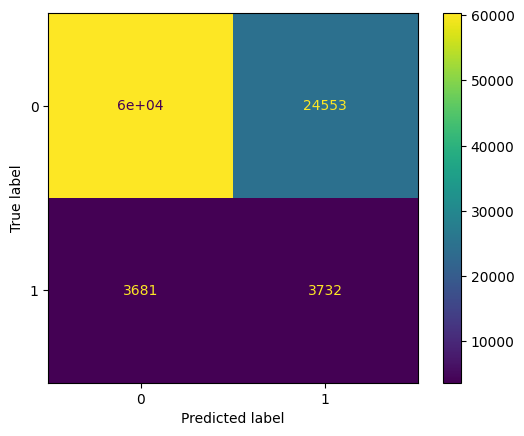

In [51]:
confusionmatrix(y_pred, y_test)

In [52]:
eval_class(lr)

accuracy(test): 0.6939536497062458
accuracy(train): 0.7080113219944907
recall(test): 0.5034399028733306
recall(train): 0.7061487528115444
precision(test): 0.13194272582640976
precision(train): 0.7087890902449419


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     84841
           1       0.13      0.50      0.21      7413

    accuracy                           0.69     92254
   macro avg       0.54      0.61      0.51     92254
weighted avg       0.88      0.69      0.76     92254



In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np

# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define the distribution of hyperparameters to sample from
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 100),  # Sample C from a logarithmic scale
    'max_iter': np.arange(100, 1000, 100),  # Sample max_iter from a range

}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

Best hyperparameters: {'penalty': 'l2', 'max_iter': 900, 'C': 3.2745491628777286}
Best cross-validation score: 0.7068564052593067


## XGboost

In [55]:
#Import xgboost model
import xgboost as xgb

#Create a  Classifier
xgbo = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

#Train the model using the training sets
xgbo.fit(X_resampled, y_resampled)

#Predict the response for test dataset
y_pred = xgbo.predict(X_test)

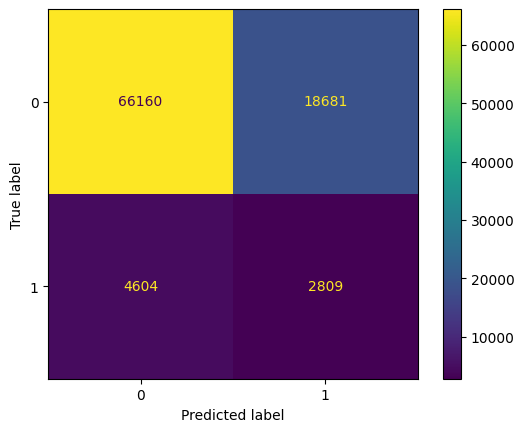

In [56]:
confusionmatrix(y_pred, y_test)

In [57]:
eval_class(xgbo)

accuracy(test): 0.7475990200966895
accuracy(train): 0.7923980894134297
recall(test): 0.3789289086739512
recall(train): 0.799686623366777
precision(test): 0.13071195905072128
precision(train): 0.7881970218553372


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     84841
           1       0.13      0.38      0.19      7413

    accuracy                           0.75     92254
   macro avg       0.53      0.58      0.52     92254
weighted avg       0.87      0.75      0.80     92254



## Random forest

In [59]:
#Import svm model
from sklearn.ensemble import RandomForestClassifier
#Create a svm Classifier
rfc = RandomForestClassifier(random_state = 42)
#Train the model using the training sets
rfc.fit(X_resampled, y_resampled)
#Predict the response for test dataset
y_pred = rfc.predict(X_test)

In [60]:
eval_class(rfc)

accuracy(test): 0.7974505170507512
accuracy(train): 0.9999974727690869
recall(test): 0.26493997032240657
recall(train): 1.0
precision(test): 0.129202026182488
precision(train): 0.9999949455637213


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     84841
           1       0.13      0.26      0.17      7413

    accuracy                           0.80     92254
   macro avg       0.53      0.55      0.53     92254
weighted avg       0.86      0.80      0.83     92254

